## ANN

El conjunto de datos Student Performance adjunto muestra los siguientes datos de algunos estudiantes:

1. Horas estudiadas
2. Notas previas
3. Actividades extracurriculares (Si / No)
4. Horas de sueño
5. Preguntas de práctica realizadas
6. Nota sacada


## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import keras

## Preprocesamiento de datos

In [2]:
dataset = pd.read_csv('Student_Performance.csv')
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# No existen valores nulos en el dataset
dataset.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
# Separacion de características
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
# Dimensiones de X & y
X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
print(X)
print()
print(y)

[[7 99 'Yes' 9 1]
 [4 82 'No' 4 2]
 [8 51 'Yes' 7 2]
 ...
 [6 83 'Yes' 8 5]
 [9 97 'Yes' 7 0]
 [7 74 'No' 8 1]]

[91. 65. 45. ... 74. 95. 64.]


In [ ]:
# Realizamos LabelEncoder para la variable caracteristica "Extracurricular Activities" y convertirla en un solo vector
X_OneHot = X.copy()

le = LabelEncoder() # instanciamos el objeto
X_OneHot[:,2] = le.fit_transform(X_OneHot[:,2]) # Le realizamos labelEncoder a la tercera columna

In [ ]:
#Imprimos el X_OneHot para verificar que se haya hecho bien el proceso
print(X_OneHot)

[[7 99 1 9 1]
 [4 82 0 4 2]
 [8 51 1 7 2]
 ...
 [6 83 1 8 5]
 [9 97 1 7 0]
 [7 74 0 8 1]]


In [ ]:
# Data Splitting con 80/20
X_train, X_test, y_train, y_test = train_test_split(X_OneHot, y, test_size = 0.2, random_state = 0)

In [ ]:
# Mostramos las dimensiones de los datos de entrenamiento y de prueba
X_train.shape, X_test.shape

((8000, 5), (2000, 5))

In [ ]:
print(X_train)

[[5 95 0 6 4]
 [2 98 0 7 4]
 [2 65 1 8 1]
 ...
 [1 76 1 6 5]
 [4 44 0 4 8]
 [8 83 1 8 1]]


In [ ]:
# Copia de los datos de entrenamiento y de prueba
X_sc_train = X_train.copy()
X_sc_test = X_test.copy()

sc = StandardScaler() # Instanciamos StandarScaler

# Estandarizamos los datos
X_sc_train = sc.fit_transform(X_sc_train)
X_sc_test = sc.fit_transform(X_sc_test)

In [ ]:
print(X_sc_train[:2,:])
print()
print(X_sc_test[:5,:])

[[ 0.01177784  1.46795645 -1.00075028 -0.31740964 -0.20579059]
 [-1.14669864  1.63989277 -1.00075028  0.2720233  -0.20579059]]

[[-0.42025311 -0.15860971 -0.94643256  1.47783947 -0.54301917]
 [ 1.12692814 -0.57257986 -0.94643256 -1.47665767  0.852917  ]
 [ 0.35333752  1.20157794 -0.94643256 -0.88575824  0.50393296]
 [-1.58063905 -1.1048272   1.05659932 -0.29485881  0.50393296]
 [-1.19384373  1.20157794 -0.94643256 -0.88575824  1.55088509]]


## Creación del modelo ANN

In [ ]:
# Inicializamos la red neuronal
ann = tf.keras.models.Sequential()

In [ ]:
# Creamos las 2 capas ocultas con 8 y 16 neuronas. Se define la función de activacion reLU
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))

In [ ]:
# Creamos la capa de salida sin función de activación específica
ann.add(tf.keras.layers.Dense(units = 1))

### Entrenamiento de la red

In [ ]:
# Compilamos la ann
ann.compile(optimizer = 'adam',
            loss = 'mean_squared_error', # Como es un problema de regresión elegimos como función de pérdida el MSE
            metrics = ['R2Score']
            )

In [ ]:
# Entrenamiento de la red
ann.fit(x = X_sc_train,
        y = y_train,
        epochs = 100,
        batch_size = 32,
        callbacks = EarlyStopping(monitor = "val_loss", patience = 3),
        validation_data = (X_sc_test, y_test))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - R2Score: -7.7788 - loss: 3311.0020 - val_R2Score: -5.2614 - val_loss: 2154.5757
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: -2.7710 - loss: 1426.0526 - val_R2Score: 0.3604 - val_loss: 220.0719
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.5888 - loss: 154.5174 - val_R2Score: 0.7391 - val_loss: 89.7659
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.7991 - loss: 75.5183 - val_R2Score: 0.8082 - val_loss: 65.9901
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.8503 - loss: 56.4720 - val_R2Score: 0.8502 - val_loss: 51.5621
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.8787 - loss: 45.0764 - val_R2Score: 0.8793 - val_loss: 41.5415
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - R2Score: 0.9030 - loss: 36.4849 - val_R2Score: 0.9022 - val_loss: 33.6549
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - R2Score: 0.9204 - loss: 29.4830

In [ ]:
history = ann.history.history

In [ ]:
print(history)

{'R2Score': [-6.968417644500732, -1.3674864768981934, 0.6789725422859192, 0.8102351427078247, 0.8561049103736877, 0.8863314986228943, 0.908022403717041, 0.9246212244033813, 0.9378837943077087, 0.9486181139945984, 0.9570730924606323, 0.9636152982711792, 0.9688364267349243, 0.9730314612388611, 0.9762125015258789, 0.978801429271698, 0.980874240398407, 0.9825839996337891, 0.9839858412742615, 0.9851579666137695, 0.9860993027687073, 0.986828088760376, 0.9873698949813843, 0.9877508282661438, 0.9879782199859619, 0.9881853461265564, 0.9883288145065308, 0.9884786009788513, 0.9885244369506836, 0.9885542988777161], 'loss': [2990.224609375, 888.4229736328125, 120.46940612792969, 71.2110595703125, 53.998355865478516, 42.655242919921875, 34.515377044677734, 28.286548614501953, 23.309669494628906, 19.281585693359375, 16.108789443969727, 13.653742790222168, 11.694417953491211, 10.120210647583008, 8.926491737365723, 7.954967975616455, 7.177144527435303, 6.535524845123291, 6.00946044921875, 5.56962203979

In [ ]:
history.keys()

dict_keys(['R2Score', 'loss', 'val_R2Score', 'val_loss'])

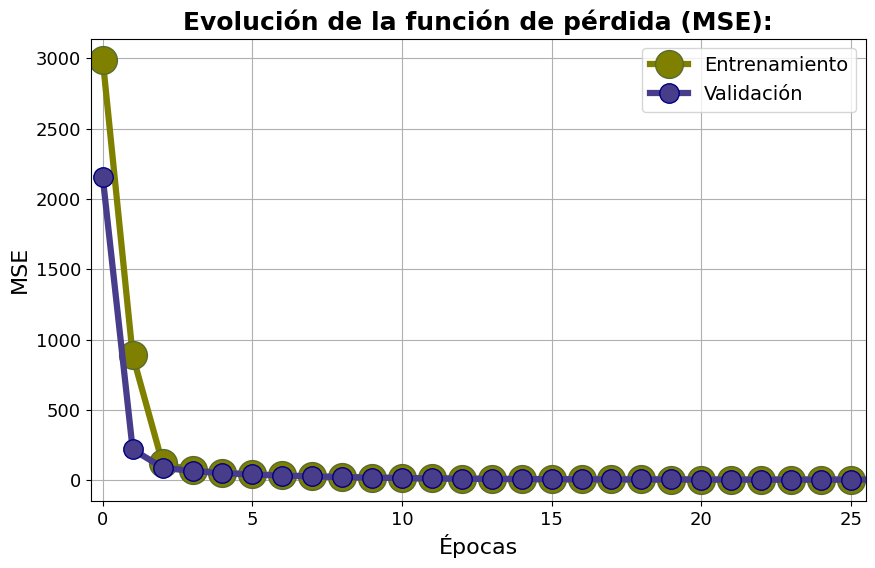

In [ ]:
figure = plt.figure(figsize = (10, 6))
plt.plot(history["loss"], c = 'olive', lw = 4.5, marker = 'o', markersize = 20, mec = 'darkolivegreen')
plt.plot(history["val_loss"], c = 'darkslateblue', lw = 4.5, marker = 'o', markersize = 14, mec = 'navy')

plt.title('Evolución de la función de pérdida (MSE):', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("MSE", fontsize = 16)

plt.xticks(range(0, 26, 5), fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlim([-0.4, 25.5])
plt.grid(True)
plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)
plt.show()

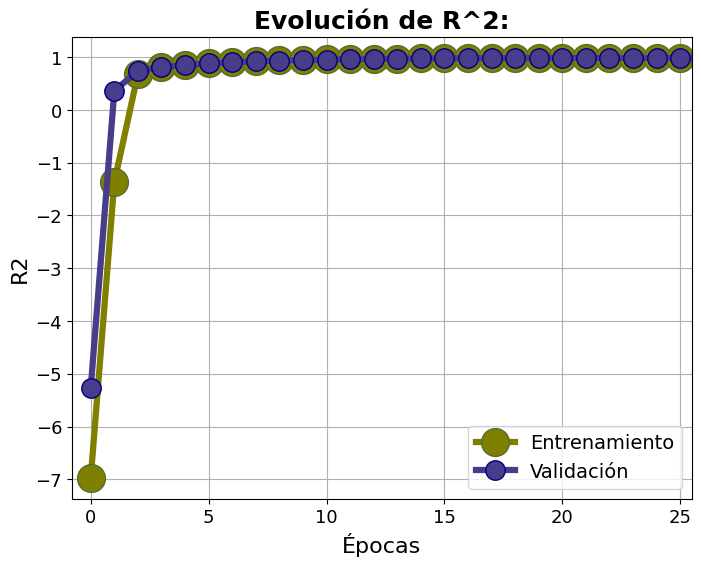

In [ ]:
figure = plt.figure(figsize = (8, 6))
plt.plot(history["R2Score"], c = 'olive', lw = 4.5, marker = 'o', markersize = 20, mec = 'darkolivegreen')
plt.plot(history["val_R2Score"], c = 'darkslateblue', lw = 4.5, marker = 'o', markersize = 14, mec = 'navy')

plt.title('Evolución de R^2:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("R2", fontsize = 16)

plt.xticks(range(0, 26, 5), fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlim([-0.8, 25.5])
plt.grid(True)
plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)
plt.show()

In [ ]:
predictions = ann.predict(X_sc_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


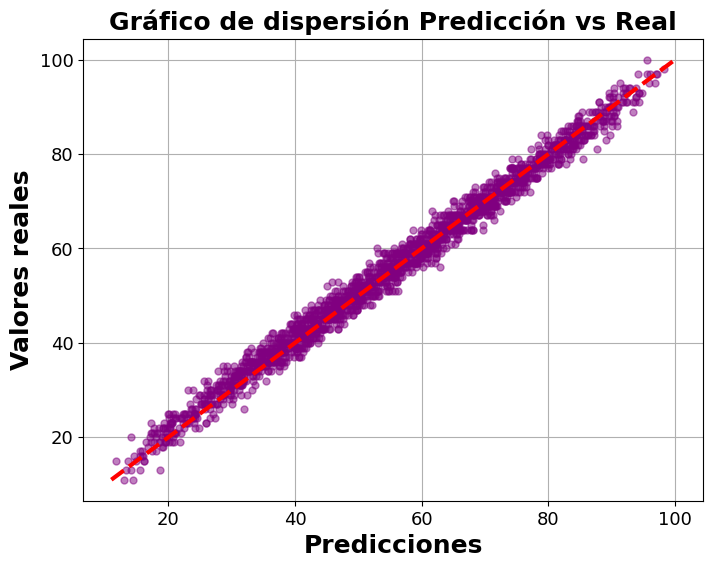

In [ ]:
figure = plt.figure(figsize = (8, 6))

plt.plot(predictions, y_test, '.', c = 'purple', ms = 10, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', ls = '--', lw = 3) # Linea recta

plt.title('Gráfico de dispersión Predicción vs Real', fontsize = 18, fontweight = 'bold')
plt.xlabel('Predicciones', fontsize = 18, fontweight = 'bold')
plt.ylabel('Valores reales', fontsize = 18, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid(True)
plt.show()

In [ ]:
# R^2 y MSE
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("El R^2 es =", round(r2, 4))
print("El error cuadratico medio es =", round(mse, 6))

El R^2 es = 0.9861
El error cuadratico medio es = 4.794349


In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 8)                     │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 16)                    │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 1)                     │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 629 (2.46 KB)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 420 (1.64 KB)

###Predicción con N estudiante generado

In [ ]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# Creamos datos de un estudiante
student = np.array([[5, 60, 'Yes', 9.5, 1]])

In [ ]:
# Aplicamos labelEncoder a la columna categórica
student[:, 2] = le.transform(student[:, 2])
print(student)

[['5' '60' '1' '9.5' '1']]


In [ ]:
# Escalamos los datos
student_sc = sc.transform(student)
print(student_sc)

[[-0.03345779 -0.57257986  1.05659932  1.77328918 -1.24098726]]


In [ ]:
# Realizamos la predicción con la red neuronal
print(f'La nota del estudiante es = {ann.predict(student_sc)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
La nota del estudiante es = [[45.96883]]


## Redes Convolusionales

Descargamos el conjunto de imagenes adjuntas que corresponden a fotos de cancer de piel benignos y malignos. Se Entrenó una red neuronal convolusional para predecir si una nueva imagen es o no cancerosa.  Se Intentaron con varios hyperparámetros, i.e: funciones de activación, número de neuronas en capas ocultas, número de kernel convolusionales, etc.

In [ ]:
# Descomprimimos el file para acceder al dataset
import zipfile
with zipfile.ZipFile('/content/Skin_Data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

### Preprocesamiento de las imágenes

#### Preprocesamiento en las imágenes de entrenamiento

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, # Normalizamos los valores para dejarlo en un rango de 0 y 1
    shear_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
    )

In [ ]:
train_dataset = train_datagen.flow_from_directory(
    'Skin_Data/TRAIN/',
    target_size = (64, 64), # Redimensionamos las imagenes a 64x64
    batch_size = 32, # lotes de 32 imágenes
    class_mode = 'binary'
    )

Found 204 images belonging to 2 classes.


In [ ]:
# Validamos que si se clasificaron correctamente
train_dataset.class_indices

{'Cancer': 0, 'NoCancer': 1}

#### Preprocesamiento en las imágenes de prueba

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
test_dataset = test_datagen.flow_from_directory(
    'Skin_Data/TEST/',
    target_size = (64, 64), # Redimensionamos las imagenes a 64x64
    batch_size = 32,
    class_mode = 'binary'
    )

Found 84 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'Cancer': 0, 'NoCancer': 1}

### Construir Primera CNN


1. Se crearon 2 capas convolucionales.
* Función de activación: ReLU.
2. Se creó 1 capa oculta con 64 neuronas.
*  Funcion de activación: ReLU.
3. Capa de salida.
* Función de activacion: Sigmoide.





In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
# Primera capa de convolución
cnn.add(tf.keras.layers.Conv2D(filters = 32,
                               kernel_size = 3,
                               activation = 'relu',
                               input_shape = (64, 64, 3))) # tamaño imágenes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Pooling 1ra capa de convolución
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
# Segunda capa de convolución
cnn.add(tf.keras.layers.Conv2D(filters = 32, # Mantenemos la misma cantidad de filtros
                               kernel_size = 3,
                               activation = 'relu'))

In [ ]:
# Pooling 2da capa de convolución
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

In [ ]:
# Flattering
cnn.add(tf.keras.layers.Flatten())

In [ ]:
# dimensiones
cnn.output_shape

(None, 6272)

In [ ]:
# Capa oculta
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [ ]:
# Capa de salida
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#### Entrenar la CNN

In [ ]:
# Compilar el CNN
cnn.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy']
          )

In [ ]:
# Entrenamiento de la red
cnn.fit(x = train_dataset, # Conjunto de entrenamiento
        validation_data = test_dataset, # Conjunto de prueba
        epochs = 50
        )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.7631 - loss: 0.6076 - val_accuracy: 0.5000 - val_loss: 0.8324
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.8075 - loss: 0.4935 - val_accuracy: 0.5000 - val_loss: 0.9576
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.8135 - loss: 0.4596 - val_accuracy: 0.5000 - val_loss: 0.9303
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.8006 - loss: 0.4599 - val_accuracy: 0.5000 - val_loss: 0.7009
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.8089 - loss: 0.4869 - val_accuracy: 0.5000 - val_loss: 0.8091
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 639ms/step - accuracy: 0.8179 - loss: 0.4265 - val_accuracy: 0.5000 - val_loss: 0.9801
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.7906 - loss: 0.4453 - val_accuracy: 0.5000 - val_loss: 0.7488
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.8253 - loss: 0.3987 - val_accuracy: 0.5000 - val_loss:

In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,439,653 (9.31 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,436 (6.20 MB)

In [ ]:
history_cnn = cnn.history.history

In [ ]:
history_cnn.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

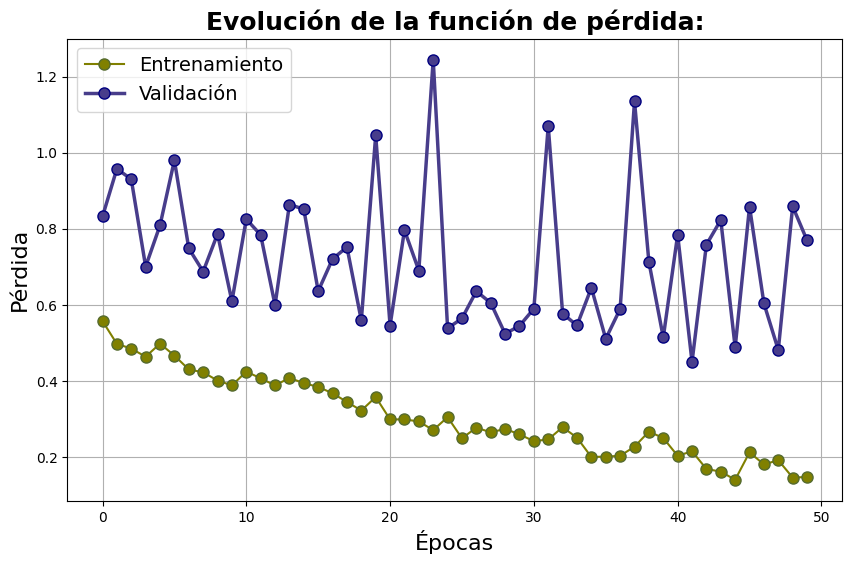

In [ ]:
# Gráfico de la función de perdida (MSE)
figure = plt.figure(figsize = (10, 6))
plt.plot(history_cnn["loss"], c = 'olive', lw = 1.5, marker = 'o', markersize = 8, mec = 'darkolivegreen')
plt.plot(history_cnn["val_loss"], c = 'darkslateblue', lw = 2.5, marker = 'o', markersize = 8, mec = 'navy')

plt.title('Evolución de la función de pérdida:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("Pérdida", fontsize = 16)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.grid(True)
plt.show()

- **Interpretación de la gráfica:** Como se nos muestra en la gráfica, la red con las imágenes de entrenamiento mantuvo una pérdida en constante decrecimiento, esto se traduce a que la red está aprendiendo cada vez mas con esos datos, sin embargo con las imagenes de validación tuvo muchisima variabilidad al momento de aprender, llegando a tener picos muy altos de pérdida en las épocas **23**, **31** y **37**.  Esto es un indicador de que la red esta teniendo sobreajuste (overfitting) y no logra adaptarse a los datos de validación generando errores al momento de clasificarlos.


In [ ]:
# MSE en el conjunto de validación en las epocas 20 al 38
history_cnn['val_loss'][20:38]

[0.546106219291687,
 0.7964305877685547,
 0.6905497312545776,
 1.2440742254257202,
 0.538896381855011,
 0.564651370048523,
 0.6362345814704895,
 0.605475127696991,
 0.524442195892334,
 0.5451939702033997,
 0.5902302861213684,
 1.0696489810943604,
 0.5775555372238159,
 0.5462892055511475,
 0.6451699137687683,
 0.5113056302070618,
 0.5894948244094849,
 1.1348156929016113]

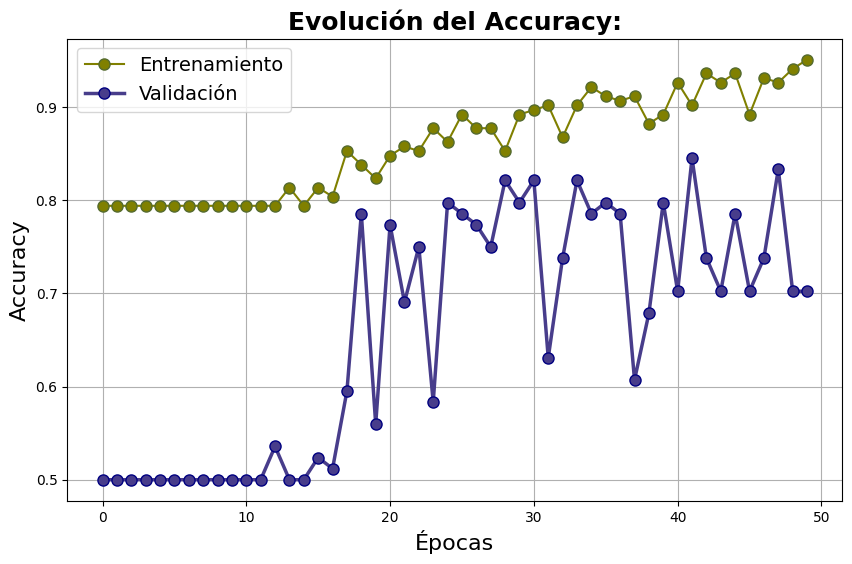

In [ ]:
# Gráfico de la precisión (accuracy)
figure = plt.figure(figsize = (10, 6))
plt.plot(history_cnn["accuracy"], c = 'olive', lw = 1.5, marker = 'o', markersize = 8, mec = 'darkolivegreen')
plt.plot(history_cnn["val_accuracy"], c = 'darkslateblue', lw = 2.5, marker = 'o', markersize = 8, mec = 'navy')

plt.title('Evolución del Accuracy:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.grid(True)
plt.show()

In [ ]:
history_cnn['val_accuracy'][20:41]

[0.773809552192688,
 0.6904761791229248,
 0.75,
 0.5833333134651184,
 0.7976190447807312,
 0.7857142686843872,
 0.773809552192688,
 0.75,
 0.8214285969734192,
 0.7976190447807312,
 0.8214285969734192,
 0.6309523582458496,
 0.738095223903656,
 0.8214285969734192,
 0.7857142686843872,
 0.7976190447807312,
 0.7857142686843872,
 0.6071428656578064,
 0.6785714030265808,
 0.7976190447807312,
 0.7023809552192688]

- **Interpretación de la gráfica:** Podemos observar que la exactitud del modelo en las primeras 11 épocas fue la misma, con un porcentaje mucho mas alto en las imágenes de entrenamiento del 80%, pero para las imágenes de validación fue del 50%. A medida que avanzaban las épocas se puede observar cierta "relación" en cuanto al accuracy tanto de la parte de entrenamiento como la de validación que van de la misma forma en ciertas épocas. Dando un accuracy en promedio para la validación del 70-80% aproximadamente.

### Construir Segunda CNN cambiando hiperparámetros para reducir el overfitting observado en la primera CNN


1. Se crearon 2 capas convolucionales.
* Función de activación: tanh.
* Primera capa convolucional con 128 filtros y tamaño de kernel 5.
* Segunda capa convolucional con 64 filtros y tamaño de kernel 4.
2. Se crearon 2 capas ocultas con 64 neuronas y aplicando el método Dropout.
*  Funcion de activación: ReLU.
3. Capa de salida.
* Función de activacion: Sigmoide.


In [ ]:
cnn2 = tf.keras.models.Sequential()

In [ ]:
cnn2.add(tf.keras.layers.Conv2D(filters = 128,
                               kernel_size = 5,
                               activation = 'tanh',
                               input_shape = (64, 64, 3)))

In [ ]:
#Pooling
cnn2.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
cnn2.add(tf.keras.layers.BatchNormalization())

In [ ]:
cnn2.add(tf.keras.layers.Conv2D(filters = 64, # A la segunda capa se le anadio el doble de filtros
                               kernel_size = 4,
                               activation = 'tanh'))

In [ ]:
cnn2.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
cnn2.add(tf.keras.layers.BatchNormalization())

In [ ]:
# Flatering
cnn2.add(tf.keras.layers.Flatten())

In [ ]:
cnn2.output_shape

(None, 10816)

In [ ]:
"""Capa oculta con método Dropout en la que basicamente funciona
desactivando por cada capa cierta cantidad de neuronas mitigando el overfitting"""
cnn2.add(tf.keras.layers.Dense(units = 64, activation='relu'))
cnn2.add(Dropout(rate = 0.2))

cnn2.add(tf.keras.layers.Dense(units = 64, activation='relu'))
cnn2.add(Dropout(rate = 0.2))

In [ ]:
# Capa de salida
cnn2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
# Compilar el CNN
cnn2.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
cnn2.fit(x = train_dataset,
         validation_data = test_dataset,
         epochs = 50,
        )

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7794 - loss: 0.9002 - val_accuracy: 0.5000 - val_loss: 0.7324
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7149 - loss: 0.9422 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 981ms/step - accuracy: 0.7717 - loss: 0.9654 - val_accuracy: 0.5000 - val_loss: 1.3871
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7851 - loss: 0.7697 - val_accuracy: 0.5000 - val_loss: 1.6157
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 966ms/step - accuracy: 0.7009 - loss: 1.0704 - val_accuracy: 0.5000 - val_loss: 0.9425
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7478 - loss: 1.0622 - val_accuracy: 0.6071 - val_loss: 0.6334
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7748 - loss: 0.9549 - val_accuracy: 0.5357 - val_loss: 0.9778
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7312 - loss: 0.8450 - val_accuracy: 0.5238 - val_loss: 0.7729
Epoch 9/5

In [ ]:
cnn2.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)                   │ (None, 60, 60, 128)         │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 27, 27, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │         692,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,513,669 (9.59 MB)

 Trainable params: 837,761 (3.20 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,675,524 (6.39 MB)

In [ ]:
history_cnn2 = cnn2.history.history

In [ ]:
history_cnn2.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

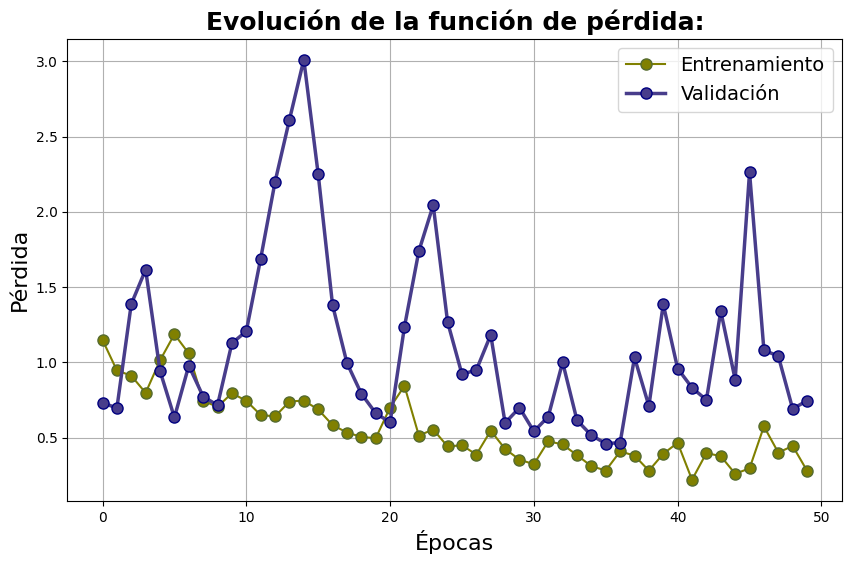

In [ ]:
# Gráfico de la función de perdida (MSE)
figure = plt.figure(figsize = (10, 6))
plt.plot(history_cnn2["loss"], c = 'olive', lw = 1.5, marker = 'o', markersize = 8, mec = 'darkolivegreen')
plt.plot(history_cnn2["val_loss"], c = 'darkslateblue', lw = 2.5, marker = 'o', markersize = 8, mec = 'navy')

plt.title('Evolución de la función de pérdida:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("Pérdida", fontsize = 16)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.grid(True)
plt.show()

Viendo el gráfico de pérdida con respecto a la primera red entrenada, tuvo de cierta manera una mejora y de cierta forma se "acopla" a los datos de entrenamiento. Sin embargo aun se siguen viendo picos muy altos de variabilidad, dando a entender que las adiciones para esta red no fueron lo suficientes para disminuir de forma significativa el overfitting.

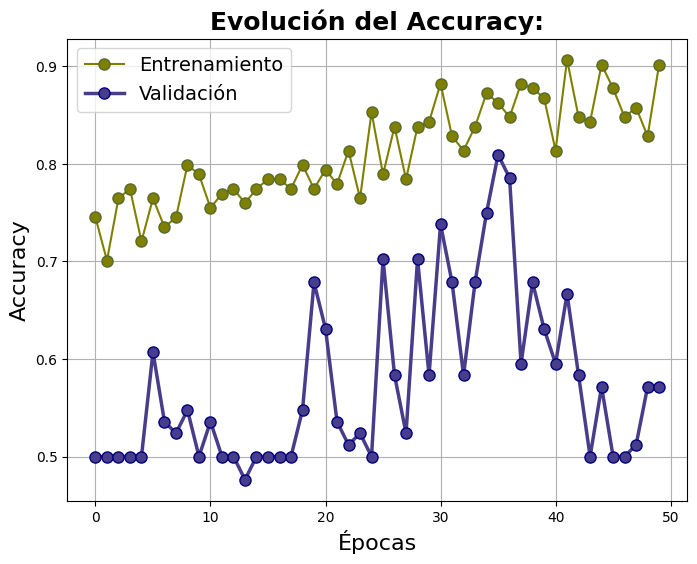

In [ ]:
# Gráfico de la precisión (accuracy)
figure = plt.figure(figsize = (8, 6))
plt.plot(history_cnn2["accuracy"], c = 'olive', lw = 1.5, marker = 'o', markersize = 8, mec = 'darkolivegreen')
plt.plot(history_cnn2["val_accuracy"], c = 'darkslateblue', lw = 2.5, marker = 'o', markersize = 8, mec = 'navy')

plt.title('Evolución del Accuracy:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.grid(True)
plt.show()

Igual caso para el gráfico de exactitud, En donde se evidencia que aun sigue un overfitting bastante pronunciado en los datos de prueba con respecto a los de entrenamiento, dando a entender que aun toca seguir modificando, añadiendo y cambiando hiperparametros para que el modelo sea mucho mas certero en su clasificación.

### Entrenamos una tercera red CNN
1. Se crearon 2 capas convolucionales.
* Función de activación: tanh.
* Primera capa convolucional con 128 filtros y tamaño de kernel 5.
* Segunda capa convolucional con 32 filtros y tamaño de kernel 3,
2. Se crearon 2 capas ocultas con 64 neuronas y agregando el hiperparametro **"kernel_regularizer"**
*  Funcion de activación: ReLU.
3. Capa de salida.
* Función de activacion: Sigmoide.

In [ ]:
cnn3 = tf.keras.models.Sequential()

In [ ]:
# Convolución
cnn3.add(tf.keras.layers.Conv2D(filters = 128,
                               kernel_size = 5,
                               activation = 'tanh',
                               input_shape = (64, 64, 3)))

In [ ]:
#Pooling
cnn3.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
# Convolución
cnn3.add(tf.keras.layers.Conv2D(filters = 32,
                               kernel_size = 3,
                               activation = 'tanh',
                               )
        )

In [ ]:
#Pooling
cnn3.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
# Flatering
cnn3.add(tf.keras.layers.Flatten())

In [ ]:
cnn3.output_shape

(None, 6272)

In [ ]:
# Capas ocultas con regularizacion l2 para evitar de cierta forma el overfitting
cnn3.add(tf.keras.layers.Dense(units = 64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
cnn3.add(Dropout(rate = 0.2))

cnn3.add(tf.keras.layers.Dense(units = 64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
cnn3.add(Dropout(rate = 0.2))

In [ ]:
# Capa de salida
cnn3.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
# Compilar el CNN
cnn3.compile(loss = 'binary_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [ ]:
cnn3.fit(x = train_dataset, validation_data = test_dataset, epochs = 50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 966ms/step - accuracy: 0.6135 - loss: 3.7034 - val_accuracy: 0.5000 - val_loss: 3.3951
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.7738 - loss: 3.0918 - val_accuracy: 0.5000 - val_loss: 3.0515
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 643ms/step - accuracy: 0.8323 - loss: 2.6520 - val_accuracy: 0.5000 - val_loss: 3.0402
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 756ms/step - accuracy: 0.8192 - loss: 2.4064 - val_accuracy: 0.5000 - val_loss: 2.5382
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.8229 - loss: 2.2381 - val_accuracy: 0.5000 - val_loss: 2.4086
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.7848 - loss: 2.1243 - val_accuracy: 0.5000 - val_loss: 2.4536
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 851ms/step - accuracy: 0.8214 - loss: 1.9148 - val_accuracy: 0.5000 - val_loss: 2.1933
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 756ms/step - accuracy: 0.7824 - loss: 1.8501 - val_accuracy: 0.5000 - val_loss

In [ ]:
cnn3.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)                   │ (None, 60, 60, 128)         │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 28, 28, 32)          │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_28 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,381,925 (5.27 MB)

 Trainable params: 460,641 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 921,284 (3.51 MB)

In [ ]:
history_cnn3 = cnn3.history.history

In [ ]:
history_cnn3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

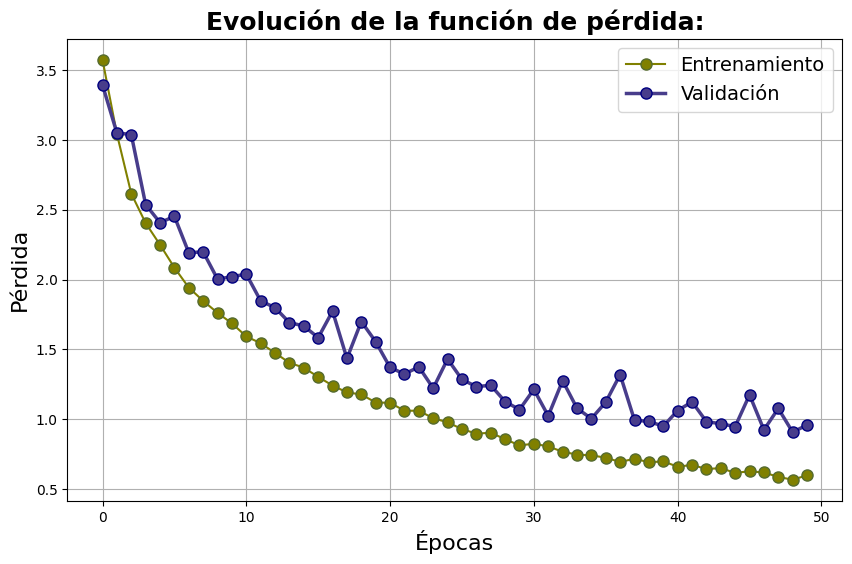

In [ ]:
# Gráfico de la función de perdida (MSE)
figure = plt.figure(figsize = (10, 6))
plt.plot(history_cnn3["loss"], c = 'olive', lw = 1.5, marker = 'o', markersize = 8, mec = 'darkolivegreen')
plt.plot(history_cnn3["val_loss"], c = 'darkslateblue', lw = 2.5, marker = 'o', markersize = 8, mec = 'navy')

plt.title('Evolución de la función de pérdida:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("Pérdida", fontsize = 16)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.grid(True)
plt.show()

En este caso, se evidencia que agregando el hiperparametro "kernel_regularizer" en donde se añade la regularización l2 también llamada regularización de Ridge. La regularización es un método estadístico para reducir los errores causados por el sobreajuste de los datos de entrenamiento. Se muestra que para la función de pérdida esta regularización hace bien su trabajo fixeando de cierta forma el overfitting encontrado en las 2 redes anteriores. Esto no significa que la red sea "mejor".

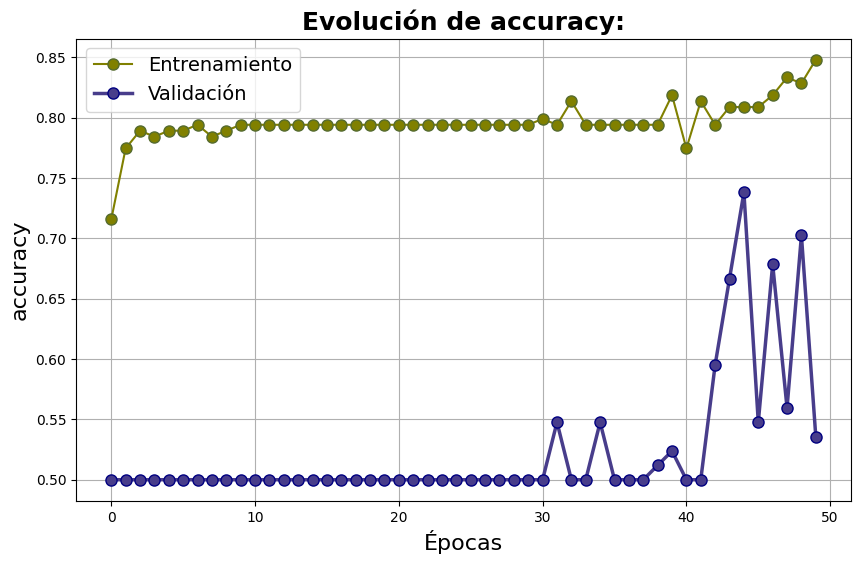

In [ ]:
# Gráfico de la función de perdida (MSE)
figure = plt.figure(figsize = (10, 6))
plt.plot(history_cnn3["accuracy"], c = 'olive', lw = 1.5, marker = 'o', markersize = 8, mec = 'darkolivegreen')
plt.plot(history_cnn3["val_accuracy"], c = 'darkslateblue', lw = 2.5, marker = 'o', markersize = 8, mec = 'navy')

plt.title('Evolución de accuracy:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("accuracy", fontsize = 16)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.grid(True)
plt.show()

Sin embargo, para el accuracy practicamente la red no aprende como deberia y no soluciona el problema encontrado. En este caso se necesitarian herramientas adicionales para encontrar los hiperparámetros mas adecuados para entrenar de forma mas eficiente nuestra red. Por fortuna, tensorflow en conjunto con keras existe una herramienta llamada Keras Tuner, el cual identifica los mejores hiperparámetros para ajustarlos a nuestra red y evitar los problemas encontrados en este ejercicio, Sin embargo no se usará tal herramienta por el momento.

## ANN 2

Otro de los conjuntos de datos interesantes que se usó  para probar modelos en Machine Learning es el conjunto MNIST Fashion. Es un conjunto con imágenes de algunas prendas de vestir en blanco y negro. Se realizó lo siguiente

1. Se utilizó una red neuronal construida a mano con dos capas ocultas. Se realizó el cálculo de las expresiones para el descenso del gradiente durante la retropropagación para esta nueva capa oculta y finalmente se implementó una red para esta tarea de clasificación

2. Se Compararon los resultados obtenidos con una ANN usando TensorFlow sin capas convolusión

3. Se Comparó los resultados 1 y 2 con una red convolusional

### Cargar base de datos

In [ ]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(name="Fashion-MNIST", version=1, parser="auto")

In [ ]:
fashion_mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### 1. Red neuronal a mano con dos capas ocultas

#### Preprocesamiento

In [ ]:
# Asignar Datos
X = fashion_mnist["data"][:5000]
y = fashion_mnist["target"][:5000]

In [ ]:
# Normalizacion de los datos
X_n = X.copy()
y_n = y.copy()

X_n = X_n.iloc[:].values / 255
y_n = y_n.iloc[:].values.astype(int) # Convertir de objeto a valor numérico

In [ ]:
# Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)

In [ ]:
# Instanciamos para OneHotEncoding con LabelBinarizer
lb = LabelBinarizer()
y_train_OneHot = lb.fit_transform(y_train)
y_test_OneHot = lb.transform(y_test)

In [ ]:
y_train_OneHot.shape

(4000, 10)

In [ ]:
# Funciones de activación
def relu(z):
    return np.maximum(0, z)

def softmax(z):
  z -= np.max(z, axis=1, keepdims=True)
  return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

In [ ]:
# Estructura de la red manual (2 capas ocultas)
input_size = 784  # Tamaño de la entrada (28x28)
hidden_size = 128  # Tamaño de la primera capa oculta
hidden_size_2 = 64   # Tamaño de la segunda capa oculta
output_size = 10     # Número de clases

# Inicialización de pesos
w1 = np.random.uniform(size = (input_size, hidden_size)) - 0.5
b1 = np.random.uniform(size = (1, hidden_size)) - 0.5

w2 = np.random.uniform(size = (hidden_size, hidden_size_2)) - 0.5
b2 = np.random.uniform(size = (1, hidden_size_2)) - 0.5

w3 = np.random.uniform(size = (hidden_size_2, output_size)) - 0.5
b3 = np.random.uniform(size = (1, output_size)) - 0.5

In [ ]:
w1.shape, b1.shape, w2.shape, b2.shape, w3.shape, b3.shape

((784, 128), (1, 128), (128, 64), (1, 64), (64, 10), (1, 10))

In [ ]:
# Definir hiperparametros para la red
ephocs = 10000 # Numero de iteraciones
etha = 0.0001/2 # Tasa de aprendizaje

In [ ]:
# Vector de error
error = np.zeros(ephocs)

#### Entrenamiento de la red

In [ ]:
# Entrenamos la red neuronal con 2 capas ocultas
for i in range(ephocs):

  # Forward pass hacia las capa ocultas

  x1 = X_train # Datos de entrada
  z1 = x1 @ w1 + b1
  x2 = relu(z1) # Usamos la funcion de activacion RELU

  z2 = x2 @ w2 + b2
  x3 = relu(z2)

  # Forward pass hacia la capa de salida
  z3 = x3 @ w3 + b3
  y_hat = softmax(z3) # Usamos la función de activacion softmax

  # Calcular el error / loss function (cross - entropy)
  error[i] = -np.sum(y_train_OneHot * np.log(y_hat))
  if i % 1000 == 0:
    print(f'iteracion {i+1} = {error[i]}')

  # Backprogragation
  delta3 = y_hat - y_train_OneHot
  d_w3 = x3.T @ delta3
  d_b3 = np.sum(delta3, axis = 0)

  delta2 = (delta3 @ w3.T) * (z2 > 0)
  d_w2 = x2.T @ delta2
  d_b2 = np.sum(delta2, axis = 0)

  delta1 = (delta2 @ w2.T) * (z1 > 0)
  d_w1 = x1.T @ delta1
  d_b1 = np.sum(delta1, axis = 0)

  # Actualizar los pesos con la direccion del gradiente descendiente
  w1 = w1 - etha * d_w1
  b1 = b1 - etha * d_b1
  w2 = w2 - etha * d_w2
  b2 = b2 - etha * d_b2
  w3 = w3 - etha * d_w3
  b3 = b3 - etha * d_b3

iteracion 1 = 64906.43565398924
iteracion 1001 = 750.6951420452366
iteracion 2001 = 220.34304262645495
iteracion 3001 = 54.834274199395864
iteracion 4001 = 22.99177523104482
iteracion 5001 = 13.104526608073808
iteracion 6001 = 8.819071393697739
iteracion 7001 = 6.490508032345063
iteracion 8001 = 5.056881384544644
iteracion 9001 = 4.107179523657038


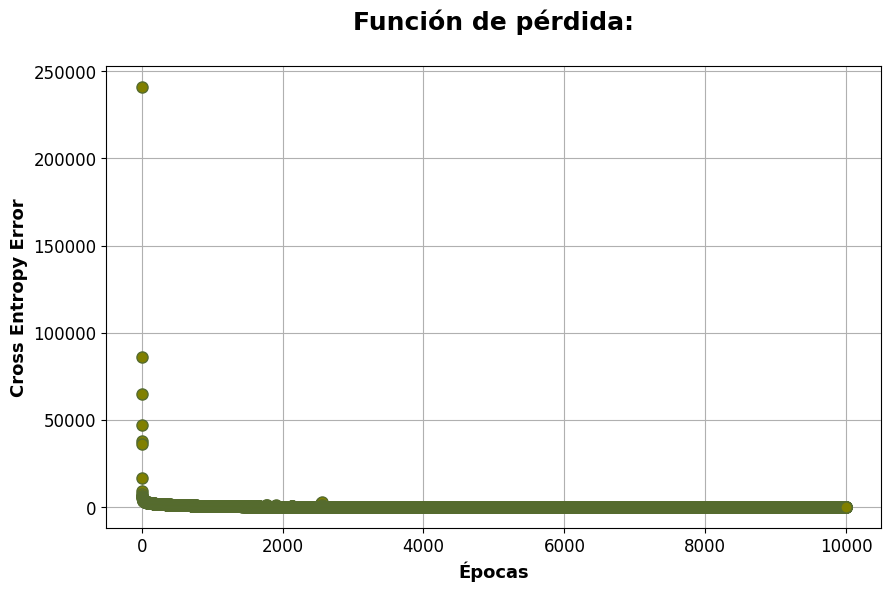

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(error, 'o', c = 'olive', ms=8 , mec = 'darkolivegreen', lw = 5)

plt.title('Función de pérdida:\n', fontsize=18, fontweight='bold')
plt.xlabel('Épocas', fontsize=13, fontweight='bold')
plt.ylabel('Cross Entropy Error', fontsize=13, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# forward pass Conjunto de prueba
a1 = X_test

z2 = a1 @ w1+b1
a2 = relu(z2)

z3 = a2 @ w2+b2
a3 = relu(z3)

z4 = a3 @ w3 + b3
y_pred = softmax(z4)

In [ ]:
# Accuracy
num_predicts = (np.argmax(y_pred, axis = 1) == np.argmax(y_test_OneHot, axis = 1))
ac = np.sum(num_predicts) / len(y_test)
print(f'Precisión con ANN manual = {ac}')

Precisión con ANN manual = 0.804


###2. ANN con tensorflow

In [ ]:
# Escalamiento de datos
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
print(X_train_sc[:3])
print()
print(X_test_sc[:3])

[[-0.01581337 -0.04040428 -0.04308843 ... -0.16445584 -0.09800294
  -0.03330868]
 [-0.01581337 -0.04040428 -0.04308843 ...  0.93606753  0.80059135
  -0.03330868]
 [-0.01581337 -0.04040428 -0.04308843 ... -0.16445584 -0.09800294
  -0.03330868]]

[[-0.01581337 -0.04040428 -0.04308843 ... -0.16445584 -0.09800294
  -0.03330868]
 [-0.01581337 -0.04040428 -0.04308843 ... -0.16445584 -0.09800294
  -0.03330868]
 [-0.01581337 -0.04040428 -0.04308843 ... -0.16445584 -0.09800294
  -0.03330868]]


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_OneHot_tf = to_categorical(y_train)
y_test_OneHot_tf = to_categorical(y_test)

In [ ]:
y_train_OneHot_tf[:]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Creación del Modelo ANN

In [ ]:
ann_mnist = tf.keras.models.Sequential()

# Capas ocultas. Seleccionamos las mismas neuronas definidas en la parte de arriba
ann_mnist.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
ann_mnist.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))

# Capa de salida softmax ya que es un problema de multiclase, 10 neuronas ya que es la cantidad de categorias del 1 al 10
ann_mnist.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [ ]:
ann_mnist.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy', # función de pérdida mas adecuada para este problema
                  metrics = ['accuracy'])

In [ ]:
ann_mnist.fit(x = X_train_sc,
              y = y_train_OneHot_tf,
              batch_size = 32,
              validation_data = (X_test_sc, y_test_OneHot_tf),
              epochs = 50)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6628 - loss: 0.9813 - val_accuracy: 0.8090 - val_loss: 0.6011
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8489 - loss: 0.4466 - val_accuracy: 0.8250 - val_loss: 0.5553
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8819 - loss: 0.3332 - val_accuracy: 0.8450 - val_loss: 0.5299
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9201 - loss: 0.2355 - val_accuracy: 0.8480 - val_loss: 0.5439
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9279 - loss: 0.2005 - val_accuracy: 0.8230 - val_loss: 0.6319
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9289 - loss: 0.1934 - val_accuracy: 0.8420 - val_loss: 0.5981
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9511 - loss: 0.1367 - val_accuracy: 0.8450 - val_loss: 0.6223
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9507 - loss: 0.1376 - val_accuracy: 0.

In [ ]:
ann_mnist.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (32, 128)                   │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [ ]:
history_ann_mnist = ann_mnist.history.history

In [ ]:
history_ann_mnist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

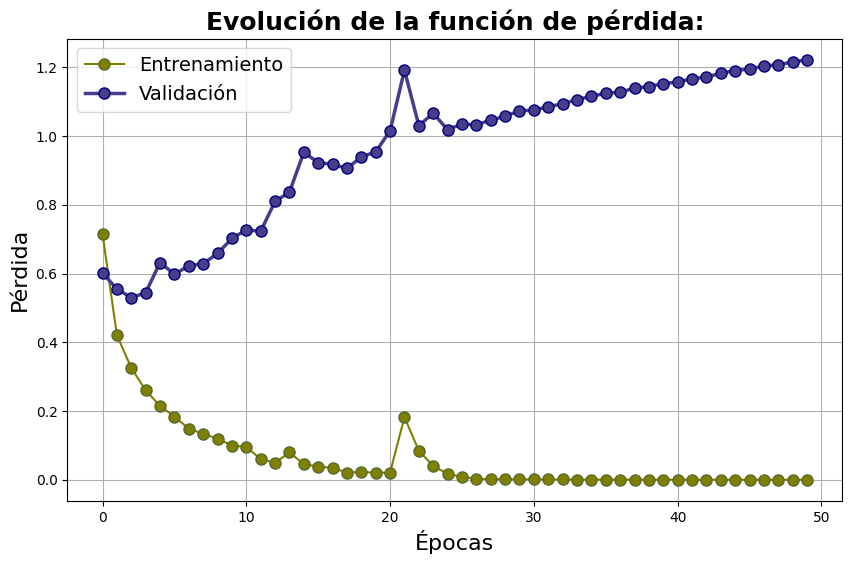

In [ ]:
# Gráfico de la función de perdida
figure = plt.figure(figsize = (10, 6))
plt.plot(history_ann_mnist["loss"], c = 'olive', lw = 1.5, marker = 'o', markersize = 8, mec = 'darkolivegreen')
plt.plot(history_ann_mnist["val_loss"], c = 'darkslateblue', lw = 2.5, marker = 'o', markersize = 8, mec = 'navy')

plt.title('Evolución de la función de pérdida:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("Pérdida", fontsize = 16)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.grid(True)
plt.show()

Vemos que existe un gran sobreajuste en estos datos, tenemos en cuenta que no hemos aplicado ninguna convolución a las imágenes

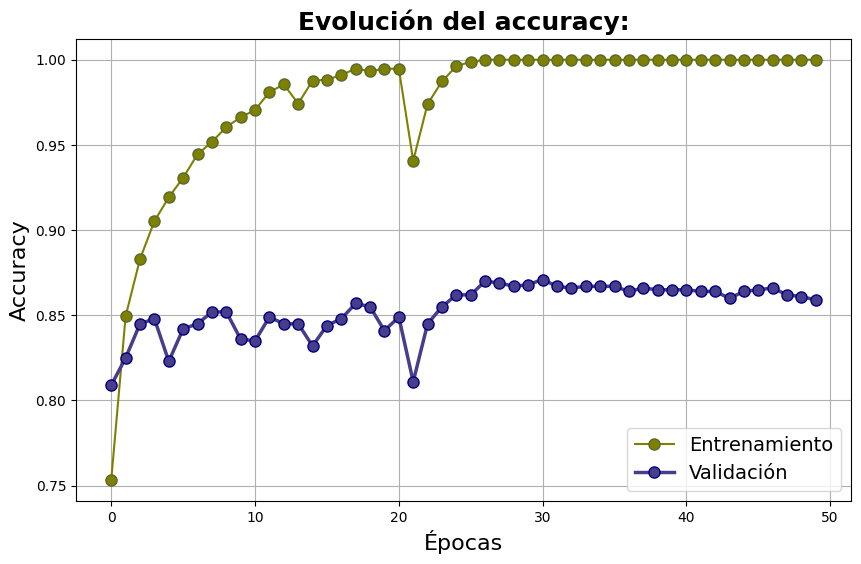

In [ ]:
# Gráfico de la función de perdida (MSE)
figure = plt.figure(figsize = (10, 6))
plt.plot(history_ann_mnist["accuracy"], c = 'olive', lw = 1.5, marker = 'o', markersize = 8, mec = 'darkolivegreen')
plt.plot(history_ann_mnist["val_accuracy"], c = 'darkslateblue', lw = 2.5, marker = 'o', markersize = 8, mec = 'navy')

plt.title('Evolución del accuracy:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.grid(True)
plt.show()

Igual caso para el accuracy sufre de overfitting, de igual manera, vemos que el accuracy usando ANN con tensorflow tuvo un ligero aumento en su precisión ya sea por el optimizador Adam que se usó y la definición de pesos que hace internamente la libreria, hay que tener en cuenta que el tiempo de ejecución fue sustancialmente inferior que la ANN creada a mano.

### CNN con tensorflow

#### Creamos el modelo

In [ ]:
cnn_mnist = tf.keras.models.Sequential()

In [ ]:
# Capa de Convolución
cnn_mnist.add(tf.keras.layers.Conv2D(filters = 64,
                                     kernel_size = 3,
                                     activation = 'relu',
                                     input_shape = ((28, 28, 1))))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Pooling
cnn_mnist.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                        strides = 2))

In [ ]:
cnn_mnist.add(tf.keras.layers.Conv2D(filters = 32,
                                     kernel_size = 3,
                                     activation = 'relu',
                                     input_shape = ((28, 28, 1))))

In [ ]:
cnn_mnist.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                        strides = 2))

In [ ]:
# Flattening
cnn_mnist.add(tf.keras.layers.Flatten())

In [ ]:
# Capa oculta
cnn_mnist.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn_mnist.add(Dropout(rate = 0.4))

In [ ]:
# Capa de salida con función de activación softmax ya que tenemos múltiples clases
cnn_mnist.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [ ]:
#Compilar CNN
from tensorflow.keras.optimizers import Adam
# Cambiamos la tasa de aprendizaje para mitigar el sobreajuste
opt = Adam(learning_rate = 0.0001)
cnn_mnist.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

#### Entrenamiento de la red

In [ ]:
#Entrenar
cnn_mnist.fit(X_train_sc.reshape(-1, 28, 28, 1),
              y_train_OneHot_tf,
              batch_size = 32,
              validation_data = (X_test_sc.reshape(-1, 28, 28, 1), y_test_OneHot_tf),
              epochs = 50,
              )

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.2848 - loss: 2.0977 - val_accuracy: 0.6490 - val_loss: 1.3036
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5681 - loss: 1.3247 - val_accuracy: 0.7240 - val_loss: 0.8790
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.6413 - loss: 1.0504 - val_accuracy: 0.7480 - val_loss: 0.7411
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6996 - loss: 0.8820 - val_accuracy: 0.7570 - val_loss: 0.6854
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7140 - loss: 0.8447 - val_accuracy: 0.7790 - val_loss: 0.6457
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.7233 - loss: 0.7699 - val_accuracy: 0.7830 - val_loss: 0.6087
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7445 - loss: 0.7285 - val_accuracy: 0.7940 - val_loss: 0.5922
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7454 - loss: 0.7125 - val_ac

In [ ]:
cnn_mnist.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,056 (832.25 KB)

 Trainable params: 71,018 (277.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,038 (554.84 KB)

In [ ]:
cnn_mnist_history = cnn_mnist.history.history

In [ ]:
cnn_mnist_history

{'accuracy': [0.3842499852180481,
  0.5885000228881836,
  0.6582499742507935,
  0.6875,
  0.7107499837875366,
  0.7264999747276306,
  0.734499990940094,
  0.7549999952316284,
  0.7577499747276306,
  0.7622500061988831,
  0.7747499942779541,
  0.7722499966621399,
  0.7872499823570251,
  0.7900000214576721,
  0.7914999723434448,
  0.7997499704360962,
  0.8032500147819519,
  0.8052499890327454,
  0.8042500019073486,
  0.8097500205039978,
  0.8052499890327454,
  0.8197500109672546,
  0.8142499923706055,
  0.8172500133514404,
  0.8180000185966492,
  0.8252500295639038,
  0.828249990940094,
  0.828499972820282,
  0.8337500095367432,
  0.8355000019073486,
  0.8360000252723694,
  0.8360000252723694,
  0.8395000100135803,
  0.8427500128746033,
  0.8442500233650208,
  0.8445000052452087,
  0.8500000238418579,
  0.8497499823570251,
  0.8492500185966492,
  0.8550000190734863,
  0.8460000157356262,
  0.8542500138282776,
  0.8617500066757202,
  0.8567500114440918,
  0.8569999933242798,
  0.867250025

In [ ]:
cnn_mnist_history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

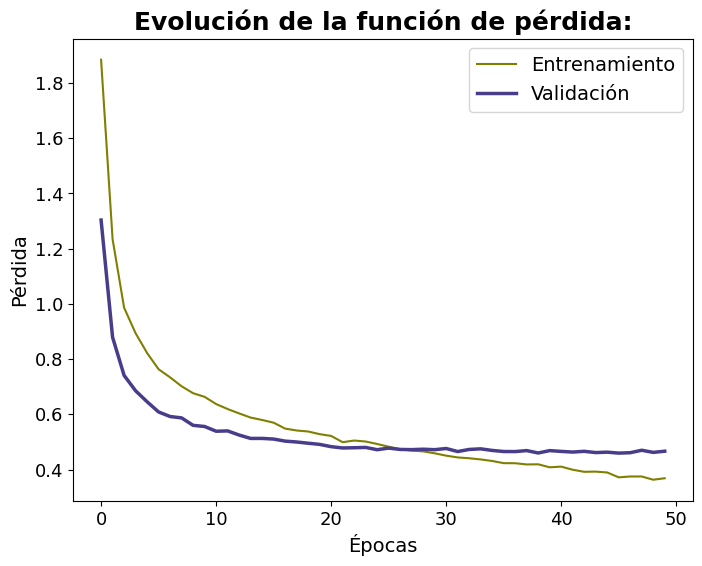

In [ ]:
figure = plt.figure(figsize = (8, 6))
plt.plot(cnn_mnist_history["loss"], c = 'olive', lw = 1.5, markersize = 8)
plt.plot(cnn_mnist_history["val_loss"], c = 'darkslateblue', lw = 2.5, markersize = 8)

plt.title('Evolución de la función de pérdida:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 14)
plt.ylabel("Pérdida", fontsize = 14)

plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

Con la tasa de aprendizaje dada, la red evito en gran parte el overfitting. La imagen de abajo es la métrica con la tasa de aprendizaje por defecto que tiene el optimizador Adam

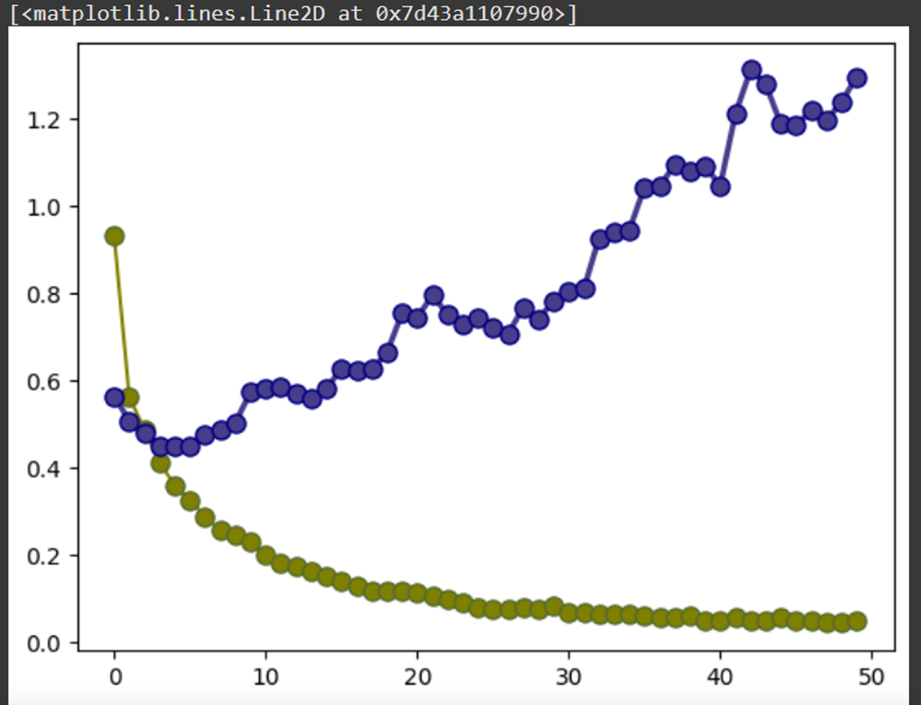

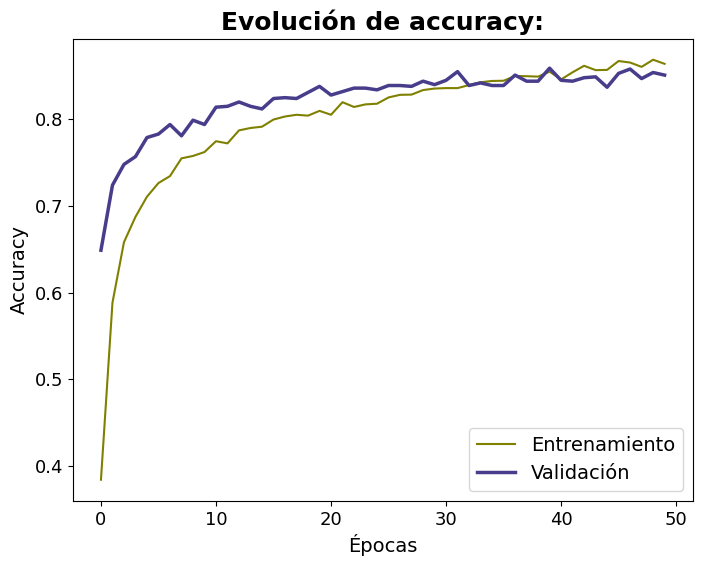

In [ ]:
figure = plt.figure(figsize = (8, 6))
plt.plot(cnn_mnist_history["accuracy"], c = 'olive', lw = 1.5, markersize = 8)
plt.plot(cnn_mnist_history["val_accuracy"], c = 'darkslateblue', lw = 2.5, markersize = 8)

plt.title('Evolución de accuracy:', fontsize=18, fontweight='bold')
plt.xlabel("Épocas", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 14)
plt.legend(['Entrenamiento', 'Validación'], fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

In [ ]:
loss, accuracy_tf = ann_mnist.evaluate(X_test_sc, y_test_OneHot_tf)
cnn_loss, cnn_accuracy = cnn_mnist.evaluate(X_test_sc.reshape(-1, 28, 28, 1), y_test_OneHot_tf)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8534 - loss: 1.1635
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8394 - loss: 0.4573


In [ ]:
print("\Métricas de los 3 modelos:\n")
print(f"ANN raw: {ac*100} %\n")
print(f"ANN en TensorFlow: {round(accuracy_tf*100, 4)} %\n")
print(f"CNN en TensorFlow: {round(cnn_accuracy*100, 4)} %\n")

\Métricas de los 3 modelos:

ANN raw: 80.4 %

ANN en TensorFlow: 85.9 %

CNN en TensorFlow: 85.1 %

